In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#upload the data
df=pd.read_csv('green_tech_data.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


Class Distribution:
 sustainability
0    85
1    15
Name: count, dtype: int64


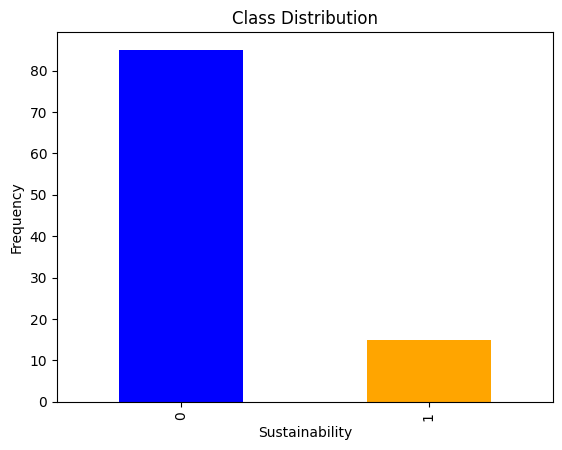

Imbalance Ratio: 0.18
Data is imbalanced.


In [8]:
# Count of each class
class_counts = df['sustainability'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Sustainability')
plt.ylabel('Frequency')
plt.show()

# Check balance threshold
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Data is imbalanced.")
else:
    print("Data is balanced.")

In [20]:
# Features (independent variables) and target (dependent variable)
# Independent variables: carbon_emissions, renewability_index, cost_efficiency
X = df[['carbon_emissions', 'renewability_index', 'cost_efficiency']]

# Dependent variable: energy_output
Y = df['energy_output']

print("Independent Variables (X):\n", X.head())
print("Dependent Variable (Y):\n", Y.head())

Independent Variables (X):
    carbon_emissions  renewability_index  cost_efficiency
0        181.089042            0.642032         0.732568
1        382.750007            0.084140         2.891096
2        306.197880            0.161629         2.932858
3        259.530469            0.898554         3.368435
4        104.606524            0.606429         3.767411
Dependent Variable (Y):
 0    128.286267
1    672.769370
2    382.920383
3    557.713622
4    916.809827
Name: energy_output, dtype: float64


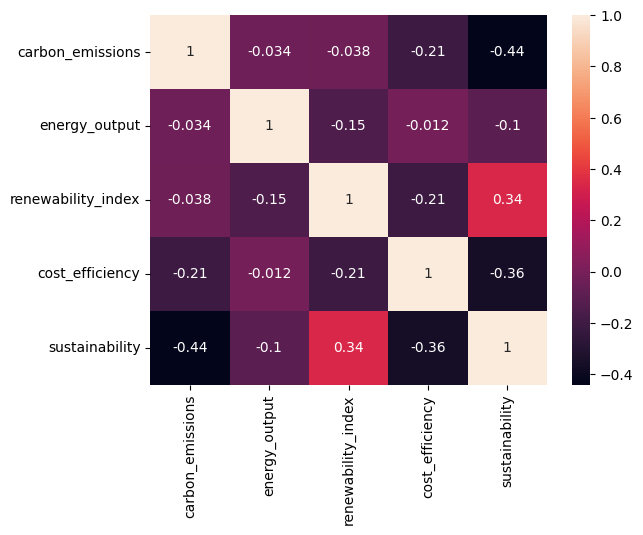

In [9]:
#create a heatmap
import seaborn as sns
import matplotlib.pyplot

sns.heatmap(df.corr(), annot=True)
matplotlib.pyplot.show()


In [11]:
print(df.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [14]:
# Example feature selection
X=df[ ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y=df['sustainability']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
#predication
y_pred=model.predict(X_test)


In [21]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.95


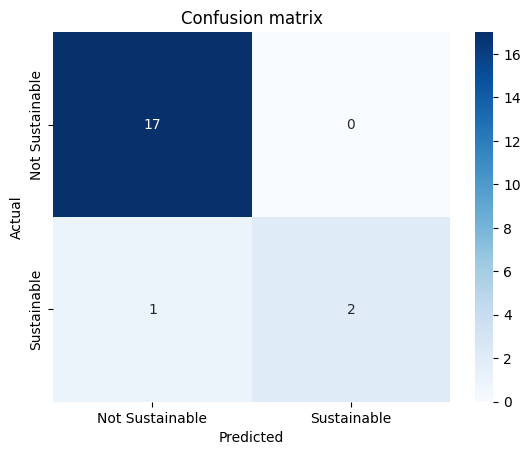

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [28]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [42]:
# Example feature selection
X=df[ ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y=df['sustainability']
# %%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# %%
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
# Feauture importance
coefficients = pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [43]:
import joblib
joblib.dump(model,'lrmodel_sustainability.')

['lrmodel_sustainability.']

In [44]:
#load model
model=joblib.load('lrmodel_sustainability.')

In [47]:
#predication
import numpy as np
import joblib
#load model
model=joblib.load('lrmodel_sustainability.')

# Assuming 'model' is your trained model
#new_data = np.array([[22.49, 0.85, 0.72]])  # Example values for carbon_emissions, renewability_index, cost_efficiency
#The model was trained on 'carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency'
# But here we have values for 'carbon_emissions', 'renewability_index', 'cost_efficiency'
# So we need to create a new X with those four features

# Select the relevant features that were used to train the model.
# Include 'energy_output' in the features used for prediction.

#Example prediction using 4 features.
new_data = np.array([[22.49, 10.0, 0.85, 0.72]])  # Example values for carbon_emissions, energy_output, renewability_index, cost_efficiency
predictions = model.predict(new_data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
import numpy as np
# Assuming 'model' is your trained model
new_data = np.array([[22.49,25, 0.85, 0.72,]])  # Example values for carbon_emissions, renewability_index, cost_efficiency
predictions = model.predict(new_data)
print("Output:",predictions)
if predictions==1:
    print("Sustainable")
else:
    print("Non-Sustainable")

Output: [1]
Sustainable


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
